In [1]:
# Assignment No. 2:- Implementing Feed-forward neural networks with Keras and TensorFlow

In [2]:
pip install matplotlib


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


11490434/11490434 [==============================] - 4s 0us/step
Epoch 1/10
750/750 [==============================] - 5s 5ms/step - loss: 1.0008 - accuracy: 0.7444 - val_loss: 0.4518 - val_accuracy: 0.8856
Epoch 2/10
750/750 [==============================] - 7s 10ms/step - loss: 0.4097 - accuracy: 0.8866 - val_loss: 0.3382 - val_accuracy: 0.9065
Epoch 3/10
750/750 [==============================] - 6s 8ms/step - loss: 0.3362 - accuracy: 0.9050 - val_loss: 0.2964 - val_accuracy: 0.9185
Epoch 4/10
750/750 [==============================] - 2s 3ms/step - loss: 0.2993 - accuracy: 0.9151 - val_loss: 0.2715 - val_accuracy: 0.9243
Epoch 5/10
750/750 [==============================] - 5s 7ms/step - loss: 0.2743 - accuracy: 0.9218 - val_loss: 0.2500 - val_accuracy: 0.9309
Epoch 6/10
750/750 [==============================] - 6s 8ms/step - loss: 0.2543 - accuracy: 0.9283 - val_loss: 0.2358 - val_accuracy: 0.9342
Epoch 7/10
750/750 [==============================] - 7s 9ms/step - loss: 0.2378 -

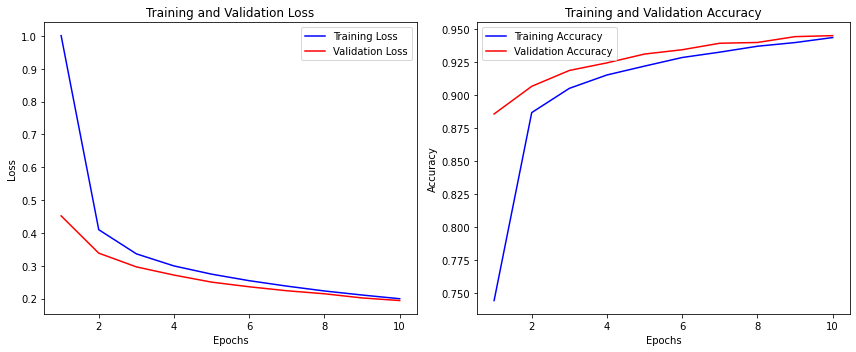

In [3]:
# Import necessary packages
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt



# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the input data to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten the input data (28x28 images to 784 pixels)
x_train = x_train.reshape((-1, 784))
x_test = x_test.reshape((-1, 784))

# Define the network architecture
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the network on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

# Plot training loss and accuracy
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

epochs = range(1, len(train_loss) + 1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()